In [1438]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1489]:
λ = 0.125
κ = 0.4
B = 2.
xc_sill = 1.33

In [1490]:
ny = 500; Ly = 160.; dy = Ly/ny
nx = 100; Lx = 8.; dx = Lx/nx

y = np.arange(-Ly/2.+dy/2.,+Ly/2.,dy)[np.newaxis,:]
x = np.arange(-Lx/2.+dx/2.,+Lx/2.,dx)[:,np.newaxis]

In [1491]:
h0 = np.exp(-(λ*y)**2) - 1.
h = h0 + 0.5*κ*x**2

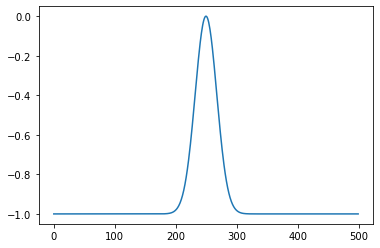

In [1492]:
plt.plot(h0.flatten())

In [1493]:
# Get Q from critical condition at sill
Q = np.sqrt(
    (12.**3 / 72.)*( κ**4 * xc_sill**6 * (1.+κ) * (B - np.max(h0) - (3./2.) * κ * xc_sill**2 * (1.+κ)) )
)
Q

1.5651188755464562

(4, -4)

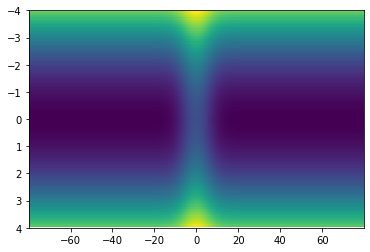

In [1494]:
plt.pcolor(y,x,h)
plt.ylim([4,-4])

#### Calculate width of zero-PV solution by solving 8th order polynomial (reduced to quartic)

In [1495]:
a = (1.+κ)/8.
b = h0 - B
e = (72.*Q**2)/(κ*(1.+κ))

p = (-3.*b**2)/(8.*a**2)
q = b**3/(8.*a**3)

Δ0 = 12.*a*e
Δ1 = 27.*b**2*e

T = ( (Δ1 + np.sqrt(Δ1**2 - 4.*Δ0**3))/2. )**(1./3.)

S = (1./2.) * np.sqrt(
    -(2./3.)*p + (1./(3.*a))*(T + Δ0/T)
)

In [1496]:
#x1 = -b/(4*a) - S + (1./2.)*np.sqrt( -4.*S**2 - 2*p + q/S)
#x2 = -b/(4*a) - S - (1./2.)*np.sqrt( -4.*S**2 - 2*p + q/S)
x3 = -b/(4*a) + S + (1./2.)*np.sqrt( -4.*S**2 - 2*p - q/S)
x4 = -b/(4*a) + S - (1./2.)*np.sqrt( -4.*S**2 - 2*p - q/S)

w3 = np.sqrt(x3)
w4 = np.sqrt(x4)

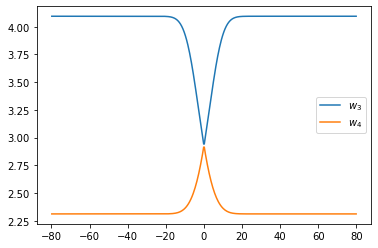

In [1497]:
plt.plot(y.flatten(),w3.flatten(), label=r'$w_{3}$')
plt.plot(y.flatten(),w4.flatten(), label=r'$w_{4}$')
plt.legend()

w = np.zeros_like(w3)
w[y<0.] = w3[y<0.]
w[y>=0.] = w4[y>=0.]

#plt.plot(y.flatten(),w_full.flatten(),'k-')
#plt.ylim([0.,3.0])

In [1498]:
xc = 12.*Q/(κ*(1.+κ)*w**3)

#### Plotting the solution

In [1499]:
xp = x-xc

In [1500]:
d = 0.5 * (1.+κ) * ((0.5*w)**2 - xp**2)
d[d<0.] = np.nan

(4, -4)

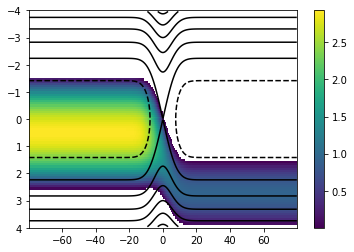

In [1501]:
plt.contour(y.flatten(),x.flatten(),h, colors='k')
plt.pcolor(y,x,d)
plt.colorbar()
plt.ylim([4,-4])